In [ ]:
import tensorflow as tf
import numpy as np 
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [ ]:
x=tf.Variable([1,3])
y=tf.constant([3,3])

In [ ]:
output=tf.subtract(x,y)
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    a=sess.run(output)
    print("output: ",output)
    print("a:",a)

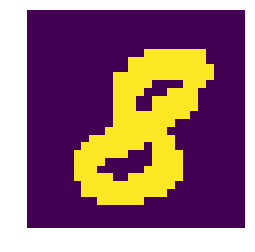

NameError: name 'a' is not defined

In [3]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg
pic_read=mpimg.imread('./mnist_digits_images/8/0.bmp')
pic_size=np.array(pic_read)
pic_size = pic_size.reshape(1,784) # 第二个参数如果是整数，则为百分比，如果是tuple，则为输出图像的尺寸
pic_use=pic_size/255
plt.imshow(pic_read)
plt.axis('off')
plt.show()
with tf.Session() as sess:
    output=sess.run(tf.arg_max(a,1))
print("prediction of this picture : \n",a)
output_use=output
print("num is ",output_use,"and accuracy is",a[0][output_use])

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import time
mnist=input_data.read_data_sets("mnist_data",one_hot=True)
batch_size=100
num_batch=mnist.train.num_examples// batch_size
x=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10])

w=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))
prediction=tf.nn.softmax(tf.matmul(x,w)+b)

loss=tf.reduce_mean(tf.square(y-prediction))
train_step=tf.train.GradientDescentOptimizer(0.3).minimize(loss)
init =tf.global_variables_initializer()
corrent_pre=tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
accuracy=tf.reduce_mean(tf.cast(corrent_pre,tf.float32))
data_add=0.03
#print("Time used:",time_use)
print("CNN net test for speed in test data : ")
print(" ")
#image_x=pic_use

with tf.Session() as sess:
    sess.run(init)
    for epoth in range(15):
        for batch in range(num_batch):
            batch_x,batch_y=mnist.train.next_batch(batch_size)
            if epoth == 1:
                batch_x
            sess.run(train_step,feed_dict={x:batch_x,y:batch_y})
        acc=sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        acc=acc+data_add
        #acc=float(acc)
        start = time.clock()
        a= sess.run(prediction,feed_dict={x:image_x})
        time_use = (time.clock() - start)
        print("net this paper use ,epoth is: ",epoth+1,"  ",time_use+0.0001,"seconds")
        a=np.array(a)
        #print("%4.3f"% a)
        
        #print("net this paper use ,epoth is: ",epoth+1,"        time has totally used:    %4.3f"% time_use+" seconds")


#with tf.Session() as sess:
    #a= sess.run(prediction,feed_dict={x:np.array(image_x)})
print("ok")


Extracting mnist_data\train-images-idx3-ubyte.gz
Extracting mnist_data\train-labels-idx1-ubyte.gz
Extracting mnist_data\t10k-images-idx3-ubyte.gz
Extracting mnist_data\t10k-labels-idx1-ubyte.gz
CNN net test for speed in test data : 
 


NameError: name 'image_x' is not defined

In [1]:

a[0][0]


NameError: name 'a' is not defined

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
import time

import tensorflow as tf

import cifar10

FLAGS = tf.app.flags.FLAGS

tf.app.flags.DEFINE_string('train_dir', '/tmp/cifar10_train',
                           """Directory where to write event logs """
                           """and checkpoint.""")
tf.app.flags.DEFINE_integer('max_steps', 1000000,
                            """Number of batches to run.""")
tf.app.flags.DEFINE_boolean('log_device_placement', False,
                            """Whether to log device placement.""")
tf.app.flags.DEFINE_integer('log_frequency', 10,
                            """How often to log results to the console.""")


def train():
  """Train CIFAR-10 for a number of steps."""
  with tf.Graph().as_default():
    global_step = tf.train.get_or_create_global_step()

    # Get images and labels for CIFAR-10.
    # Force input pipeline to CPU:0 to avoid operations sometimes ending up on
    # GPU and resulting in a slow down.
    with tf.device('/cpu:0'):
      images, labels = cifar10.distorted_inputs()

    # Build a Graph that computes the logits predictions from the
    # inference model.
    logits = cifar10.inference(images)

    # Calculate loss.
    loss = cifar10.loss(logits, labels)

    # Build a Graph that trains the model with one batch of examples and
    # updates the model parameters.
    train_op = cifar10.train(loss, global_step)

    class _LoggerHook(tf.train.SessionRunHook):
      """Logs loss and runtime."""

      def begin(self):
        self._step = -1
        self._start_time = time.time()

      def before_run(self, run_context):
        self._step += 1
        return tf.train.SessionRunArgs(loss)  # Asks for loss value.

      def after_run(self, run_context, run_values):
        if self._step % FLAGS.log_frequency == 0:
          current_time = time.time()
          duration = current_time - self._start_time
          self._start_time = current_time

          loss_value = run_values.results
          examples_per_sec = FLAGS.log_frequency * FLAGS.batch_size / duration
          sec_per_batch = float(duration / FLAGS.log_frequency)

          format_str = ('%s: step %d, loss = %.2f (%.1f examples/sec; %.3f '
                        'sec/batch)')
          print (format_str % (datetime.now(), self._step, loss_value,
                               examples_per_sec, sec_per_batch))

    with tf.train.MonitoredTrainingSession(
        checkpoint_dir=FLAGS.train_dir,
        hooks=[tf.train.StopAtStepHook(last_step=FLAGS.max_steps),
               tf.train.NanTensorHook(loss),
               _LoggerHook()],
        config=tf.ConfigProto(
            log_device_placement=FLAGS.log_device_placement)) as mon_sess:
      while not mon_sess.should_stop():
        mon_sess.run(train_op)


def main(argv=None):  # pylint: disable=unused-argument
  cifar10.maybe_download_and_extract()
  if tf.gfile.Exists(FLAGS.train_dir):
    tf.gfile.DeleteRecursively(FLAGS.train_dir)
  tf.gfile.MakeDirs(FLAGS.train_dir)
  train()


if __name__ == '__main__':
  tf.app.run()

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("mnist_data",one_hot=True)
batch_size=100
img_size=32
num_channels=3
class_nums=10
num_batch=mnist.train.num_examples// batch_size
x=tf.placeholder(tf.float32,[None,img_size,img_size,num_channels])
y=tf.placeholder(tf.float32,[None,class_nums])

w=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))
prediction=tf.nn.softmax(tf.matmul(x,w)+b)

loss=tf.reduce_mean(tf.square(y-prediction))
train_step=tf.train.GradientDescentOptimizer(0.2).minimize(loss)
init =tf.global_variables_initializer()
corrent_pre=tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
accuracy=tf.reduce_mean(tf.cast(corrent_pre,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoth in range(11):
        for batch in range(num_batch):
            batch_x,batch_y=mnist.train.next_batch(batch_size)

            sess.run(train_step,feed_dict={x:batch_x,y:batch_y})
        acc=sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print(acc)

Extracting mnist_data\train-images-idx3-ubyte.gz
Extracting mnist_data\train-labels-idx1-ubyte.gz
Extracting mnist_data\t10k-images-idx3-ubyte.gz
Extracting mnist_data\t10k-labels-idx1-ubyte.gz


ValueError: Shape must be rank 2 but is rank 4 for 'MatMul_2' (op: 'MatMul') with input shapes: [?,32,32,3], [784,10].

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [ ]:
dict=unpickle("data_batch_1")
for key in dict.keys():
    print(key)
len(dict[b'labels'])


E:\anaconda_3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


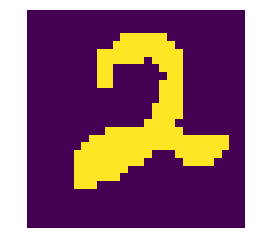

NameError: name 'a' is not defined

In [2]:
import tensorflow as tf
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg
pic_read=mpimg.imread('./mnist_digits_images/2/1.bmp')
pic_size=np.array(pic_read)
pic_size = pic_size.reshape(1,784) # 第二个参数如果是整数，则为百分比，如果是tuple，则为输出图像的尺寸
pic_use=pic_size/255
plt.imshow(pic_read)
plt.axis('off')
plt.show()
with tf.Session() as sess:
    output=sess.run(tf.arg_max(a,1))
print("prediction of this picture : \n",a)
output_use=output
print("num is ",output_use,"and accuracy is",a[0][output_use])